In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
jaxadi_results = np.load("jaxadi_benchmark_results.npz")
cusadi_results = np.load("cuda_benchmark_results.npz")

jaxadi_results = dict(jaxadi_results)
cusadi_results = dict(cusadi_results)

In [3]:
# Extracting data
jaxadi_fn_1e1 = np.array(jaxadi_results["fn_1e1"])
jaxadi_fn_1e2 = np.array(jaxadi_results["fn_1e2"])
cusadi_fn_1e1 = np.array(cusadi_results["fn_1e1"])
cusadi_fn_1e2 = np.array(cusadi_results["fn_1e2"])

In [4]:
# Function to flatten arrays for CDF and scatter plots
def flatten(arr):
    return np.array([item for sublist in arr for item in sublist])

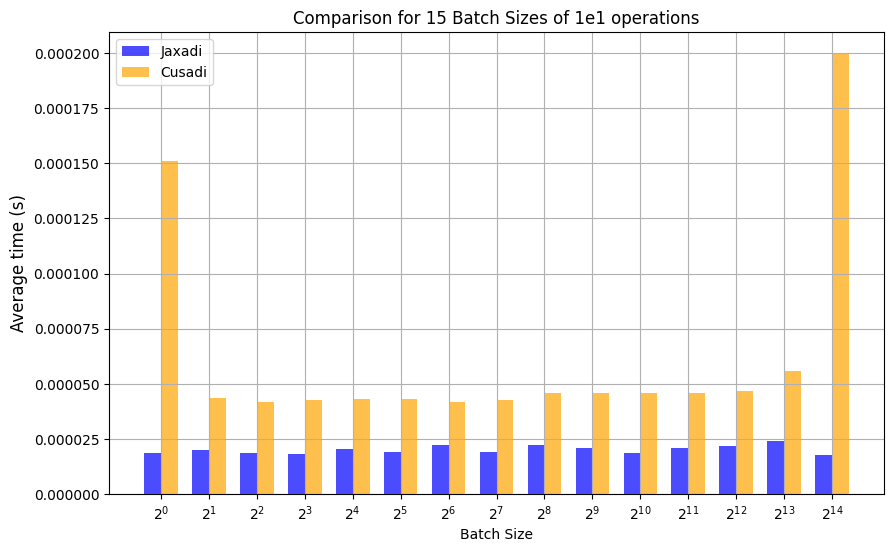

In [5]:
# Assuming `jaxadi_results` and `cusadi_results` are your dictionaries with 'fn_1e1' and 'N_ENVS'

# Extracting data
jaxadi_fn_1e1 = np.array(jaxadi_results["fn_1e1"])  # Shape (21, 20)
cusadi_fn_1e1 = np.array(cusadi_results["fn_1e1"])  # Shape (21, 20)
batch_sizes = ["$2^{" + f"{i}" + "}$" for i in range(15)]  # Assuming N_ENVS contains the 20 batch sizes

# Calculate the mean evaluation time for each batch size (across the 21 evaluations)
mean_jaxadi_1e1 = jaxadi_fn_1e1.mean(axis=1)  # Averaging across the evaluations for each batch size
mean_cusadi_1e1 = cusadi_fn_1e1.mean(axis=1)  # Same for cusadi

# Editable parameter: how many batch sizes to show (set this to your preferred number)
num_batches_to_plot = 15  # Change this number to plot fewer or more batch sizes

# Limit the data to the specified number of batch sizes
mean_jaxadi_1e1 = mean_jaxadi_1e1[:num_batches_to_plot]
mean_cusadi_1e1 = mean_cusadi_1e1[:num_batches_to_plot]
batch_sizes_to_plot = batch_sizes[:num_batches_to_plot]

# Set the width of the bars
bar_width = 0.35

# Plot the overlay of bars, with slight shifts for visibility
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(num_batches_to_plot) - bar_width / 2,
    mean_jaxadi_1e1,
    width=bar_width,
    label="Jaxadi",
    alpha=0.7,
    color="blue",
)
plt.bar(
    np.arange(num_batches_to_plot) + bar_width / 2,
    mean_cusadi_1e1,
    width=bar_width,
    label="Cusadi",
    alpha=0.7,
    color="orange",
)

# Properly label the x-axis with batch sizes
plt.xticks(np.arange(num_batches_to_plot), batch_sizes_to_plot)

# Add labels and title
plt.xlabel("Batch Size")
plt.ylabel("Average time (s)", fontsize=12)
plt.title(f"Comparison for {num_batches_to_plot} Batch Sizes of 1e1 operations")
plt.legend()
plt.grid()
plt.savefig("../docs/static/images/compare_1e1_bar.png")

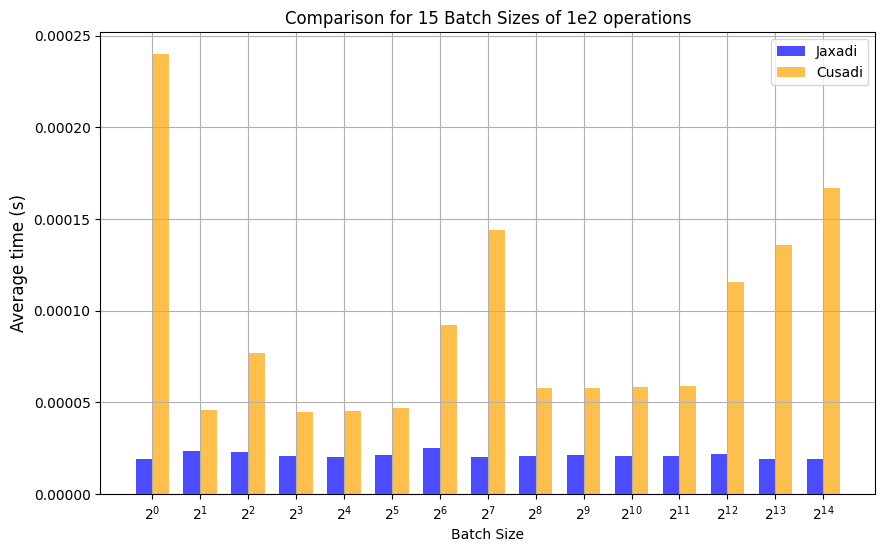

In [6]:
# Assuming `jaxadi_results` and `cusadi_results` are your dictionaries with 'fn_1e1' and 'N_ENVS'

# Extracting data
jaxadi_fn_1e2 = np.array(jaxadi_results["fn_1e2"])  # Shape (21, 20)
cusadi_fn_1e2 = np.array(cusadi_results["fn_1e2"])  # Shape (21, 20)
batch_sizes = ["$2^{" + f"{i}" + "}$" for i in range(15)]  # Assuming N_ENVS contains the 20 batch sizes

# Calculate the mean evaluation time for each batch size (across the 21 evaluations)
mean_jaxadi_1e2 = jaxadi_fn_1e2.mean(axis=1)  # Averaging across the evaluations for each batch size
mean_cusadi_1e2 = cusadi_fn_1e2.mean(axis=1)  # Same for cusadi

# Editable parameter: how many batch sizes to show (set this to your preferred number)
num_batches_to_plot = 15  # Change this number to plot fewer or more batch sizes

# Limit the data to the specified number of batch sizes
mean_jaxadi_1e2 = mean_jaxadi_1e2[:num_batches_to_plot]
mean_cusadi_1e2 = mean_cusadi_1e2[:num_batches_to_plot]
batch_sizes_to_plot = batch_sizes[:num_batches_to_plot]

# Set the width of the bars
bar_width = 0.35

# Plot the overlay of bars, with slight shifts for visibility
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(num_batches_to_plot) - bar_width / 2,
    mean_jaxadi_1e2,
    width=bar_width,
    label="Jaxadi",
    alpha=0.7,
    color="blue",
)
plt.bar(
    np.arange(num_batches_to_plot) + bar_width / 2,
    mean_cusadi_1e2,
    width=bar_width,
    label="Cusadi",
    alpha=0.7,
    color="orange",
)

# Properly label the x-axis with batch sizes
plt.xticks(np.arange(num_batches_to_plot), batch_sizes_to_plot)

# Add labels and title
plt.xlabel("Batch Size")
# Change the y-axis label
plt.ylabel("Average time (s)", fontsize=12)

plt.title(f"Comparison for {num_batches_to_plot} Batch Sizes of 1e2 operations")
plt.legend()
plt.grid()
plt.savefig("../docs/static/images/compare_1e2_bar.png")

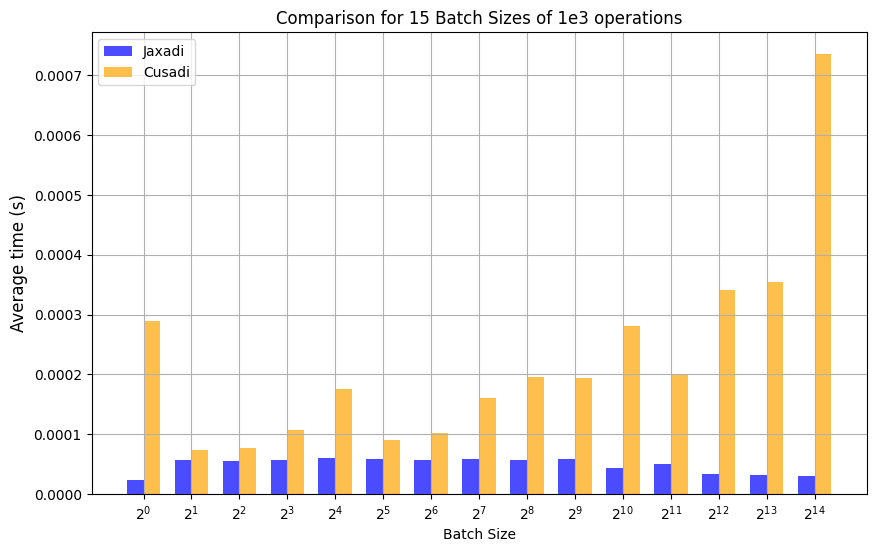

In [7]:
# Assuming `jaxadi_results` and `cusadi_results` are your dictionaries with 'fn_1e1' and 'N_ENVS'

# Extracting data
jaxadi_fn_1e3 = np.array(jaxadi_results["fn_1e3"])  # Shape (21, 20)
cusadi_fn_1e3 = np.array(cusadi_results["fn_1e3"])  # Shape (21, 20)
batch_sizes = ["$2^{" + f"{i}" + "}$" for i in range(15)]  # Assuming N_ENVS contains the 20 batch sizes

# Calculate the mean evaluation time for each batch size (across the 21 evaluations)
mean_jaxadi_1e3 = jaxadi_fn_1e3.mean(axis=1)  # Averaging across the evaluations for each batch size
mean_cusadi_1e3 = cusadi_fn_1e3.mean(axis=1)  # Same for cusadi

# Editable parameter: how many batch sizes to show (set this to your preferred number)
num_batches_to_plot = 15  # Change this number to plot fewer or more batch sizes

# Limit the data to the specified number of batch sizes
mean_jaxadi_1e3 = mean_jaxadi_1e3[:num_batches_to_plot]
mean_cusadi_1e3 = mean_cusadi_1e3[:num_batches_to_plot]
batch_sizes_to_plot = batch_sizes[:num_batches_to_plot]

# Set the width of the bars
bar_width = 0.35

# Plot the overlay of bars, with slight shifts for visibility
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(num_batches_to_plot) - bar_width / 2,
    mean_jaxadi_1e3,
    width=bar_width,
    label="Jaxadi",
    alpha=0.7,
    color="blue",
)
plt.bar(
    np.arange(num_batches_to_plot) + bar_width / 2,
    mean_cusadi_1e3,
    width=bar_width,
    label="Cusadi",
    alpha=0.7,
    color="orange",
)

# Properly label the x-axis with batch sizes
plt.xticks(np.arange(num_batches_to_plot), batch_sizes_to_plot)

# Add labels and title
plt.xlabel("Batch Size")
plt.ylabel("Average time (s)", fontsize=12)
plt.title(f"Comparison for {num_batches_to_plot} Batch Sizes of 1e3 operations")
plt.legend()
plt.grid()
plt.savefig("../docs/static/images/compare_1e3_bar.png")

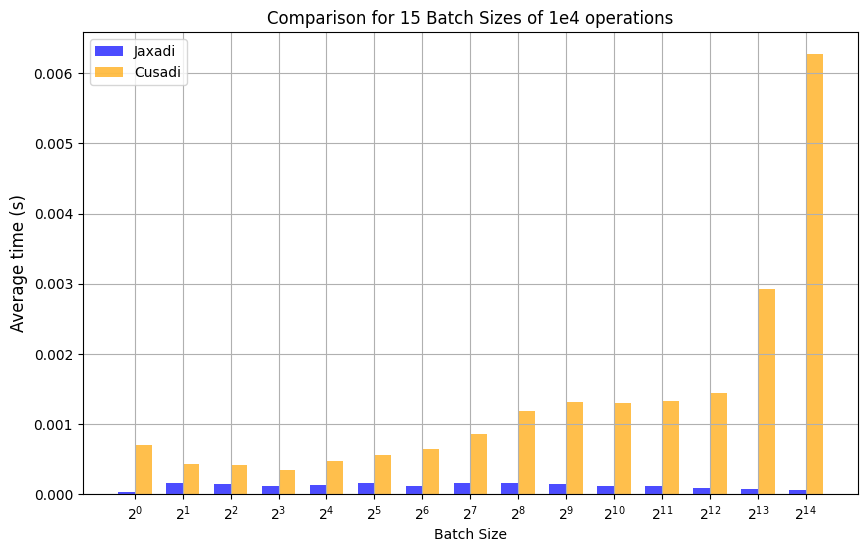

In [8]:
# Assuming `jaxadi_results` and `cusadi_results` are your dictionaries with 'fn_1e1' and 'N_ENVS'

# Extracting data
jaxadi_fn_1e4 = np.array(jaxadi_results["fn_1e4"])  # Shape (21, 20)
cusadi_fn_1e4 = np.array(cusadi_results["fn_1e4"])  # Shape (21, 20)
batch_sizes = ["$2^{" + f"{i}" + "}$" for i in range(15)]  # Assuming N_ENVS contains the 20 batch sizes

# Calculate the mean evaluation time for each batch size (across the 21 evaluations)
mean_jaxadi_1e4 = jaxadi_fn_1e4.mean(axis=1)  # Averaging across the evaluations for each batch size
mean_cusadi_1e4 = cusadi_fn_1e4.mean(axis=1)  # Same for cusadi

# Editable parameter: how many batch sizes to show (set this to your preferred number)
num_batches_to_plot = 15  # Change this number to plot fewer or more batch sizes

# Limit the data to the specified number of batch sizes
mean_jaxadi_1e4 = mean_jaxadi_1e4[:num_batches_to_plot]
mean_cusadi_1e4 = mean_cusadi_1e4[:num_batches_to_plot]
batch_sizes_to_plot = batch_sizes[:num_batches_to_plot]

# Set the width of the bars
bar_width = 0.35

# Plot the overlay of bars, with slight shifts for visibility
plt.figure(figsize=(10, 6))
plt.bar(
    np.arange(num_batches_to_plot) - bar_width / 2,
    mean_jaxadi_1e4,
    width=bar_width,
    label="Jaxadi",
    alpha=0.7,
    color="blue",
)
plt.bar(
    np.arange(num_batches_to_plot) + bar_width / 2,
    mean_cusadi_1e4,
    width=bar_width,
    label="Cusadi",
    alpha=0.7,
    color="orange",
)

# Properly label the x-axis with batch sizes
plt.xticks(np.arange(num_batches_to_plot), batch_sizes_to_plot)

# Add labels and title
plt.xlabel("Batch Size")
plt.ylabel("Average time (s)", fontsize=12)
plt.title(f"Comparison for {num_batches_to_plot} Batch Sizes of 1e4 operations")
plt.legend()
plt.grid()
plt.savefig("../docs/static/images/compare_1e4_bar.png")

In [9]:
print(mean_jaxadi_1e4, mean_cusadi_1e4)

[3.26428997e-05 1.54257200e-04 1.40394200e-04 1.20741900e-04
 1.26349699e-04 1.52185100e-04 1.22131800e-04 1.56547500e-04
 1.60316400e-04 1.50377700e-04 1.19020000e-04 1.19936100e-04
 8.12263999e-05 7.18936995e-05 5.52091004e-05] [0.00069952 0.00043383 0.00041757 0.00033801 0.00047259 0.00056109
 0.00064818 0.00085121 0.00118424 0.00131784 0.00129313 0.00133401
 0.00144084 0.00293082 0.00627279]


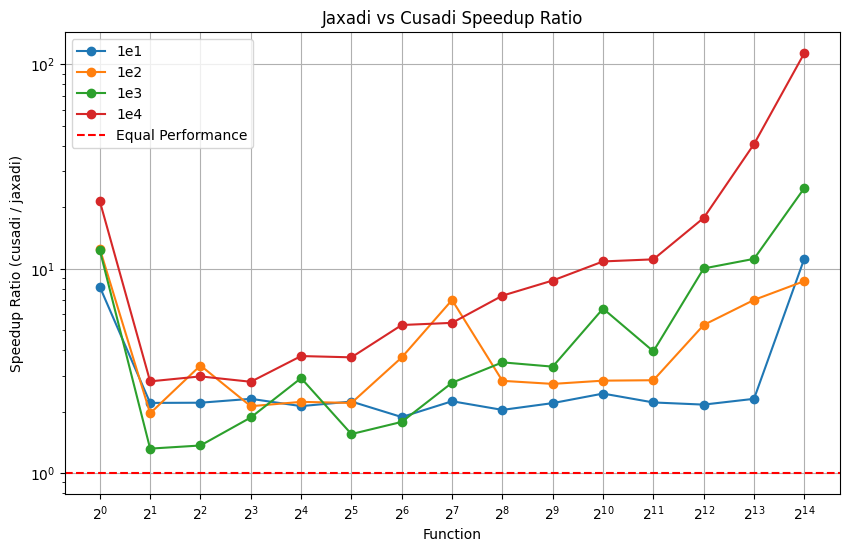

In [14]:
# 3. Speedup Ratio Plot (cusadi_time / jaxadi_time)
speedup_ratio1 = mean_cusadi_1e1 / mean_jaxadi_1e1
speedup_ratio2 = mean_cusadi_1e2 / mean_jaxadi_1e2
speedup_ratio3 = mean_cusadi_1e3 / mean_jaxadi_1e3
speedup_ratio4 = mean_cusadi_1e4 / mean_jaxadi_1e4
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, speedup_ratio1, marker="o", label="1e1")
plt.plot(batch_sizes, speedup_ratio2, marker="o", label="1e2")
plt.plot(batch_sizes, speedup_ratio3, marker="o", label="1e3")
plt.plot(batch_sizes, speedup_ratio4, marker="o", label="1e4")
plt.axhline(1, color="red", linestyle="--", label="Equal Performance")
plt.xlabel("Function")
plt.ylabel("Speedup Ratio (cusadi / jaxadi)")
plt.title("Jaxadi vs Cusadi Speedup Ratio")
plt.legend()
plt.yscale("log")
plt.grid()
plt.savefig("../docs/static/images/speedup_ratio.png")